In [1]:
import pandas as pd
import numpy as np
import yfinance

In [8]:
nvidia = yfinance.Ticker('NVDA')

In [9]:
nvidia.info

{'zip': '95051',
 'sector': 'Technology',
 'fullTimeEmployees': 13775,
 'longBusinessSummary': "NVIDIA Corporation operates as a visual computing company worldwide. It operates in two segments, GPU and Tegra Processor. The GPU segment offers processors, which include GeForce for PC gaming and mainstream PCs; GeForce NOW for cloud-based gaming; Quadro for design professionals working in computer-aided design, video editing, special effects, and other creative applications; Tesla for artificial intelligence (AI) utilizing deep learning, accelerated computing, and general purpose computing; GRID, which provides power of NVIDIA graphics through the cloud and datacenters; DGX for AI scientists, researchers, and developers; and EGX for accelerated AI computing at the edge. The Tegra Processor segment provides processors comprising SHIELD devices and services designed to harness the power of mobile-cloud to revolutionize home entertainment, AI, and gaming; AGX, a power-efficient AI computing 

In [10]:
df = nvidia.history(period='1d', interval='1m')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2020-12-22 09:30:00-05:00,532.770020,533.070007,531.890015,532.239990,155786,0,0
2020-12-22 09:31:00-05:00,531.900024,533.489929,531.657471,532.000000,48298,0,0
2020-12-22 09:32:00-05:00,532.150024,532.284973,530.820007,531.864197,25866,0,0
2020-12-22 09:33:00-05:00,532.000000,532.000000,530.349976,530.989990,26245,0,0
2020-12-22 09:34:00-05:00,530.861572,531.080017,529.500000,529.669983,38176,0,0


In [13]:
df.index.max()

Timestamp('2020-12-22 15:59:00-0500', tz='America/New_York')

In [16]:
df_low = df[['Low']]

df_low.head()

,Low
Datetime,
2020-12-22 09:30:00-05:00,531.890015
2020-12-22 09:31:00-05:00,531.657471
2020-12-22 09:32:00-05:00,530.820007
2020-12-22 09:33:00-05:00,530.349976
2020-12-22 09:34:00-05:00,529.500000


In [17]:
df_low['date'] = pd.to_datetime(df_low.index).time
df_low.set_index('date',inplace=True)

df_low.head()

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Low
date,
09:30:00,531.890015
09:31:00,531.657471
09:32:00,530.820007
09:33:00,530.349976
09:34:00,529.500000


In [18]:
X = df_low.index.values
y = df_low['Low'].values

# split 20% for testing the model
offset = int(0.20*len(df_low))

X_train = X[:-offset]
X_test = X[-offset:]
y_train = y[:-offset]
y_test = y[-offset:]

print(len(X_train), len(X_test), len(y_train), len(y_test))

312 78 312 78


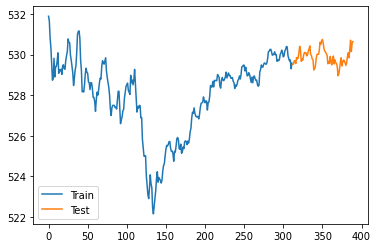

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(y_train)), y_train, label='Train')
plt.plot(range(len(y_train), len(y)), y_test, label='Test')
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(4,0,1)).fit()
forecast = model.forecast(steps=1)[0]

In [27]:
print(f'Real time data {y_train[len(y_train) - 1]}')
print(f'Real time data {y_test[0]}')
print(f'Real time data {forecast}')

Real time data 529.577880859375
Real time data 529.52001953125
Real time data 529.5820863754807


In [28]:
# import pyotp
# import robin_stocks as robinhood
# RH_USER_EMAIL = <<<YOUR EMAIL GOES HERE>>>
# RH_PASSWORD = <<<YOUR PASSWORD GOES HERE>>>
# RH_MFA_CODE = <<<THE ALPHANUMERIC CODE GOES HERE>>>
# timed_otp = pyotp.TOTP(RH_MFA_CODE).now()
# login = rh.login(RH_USER_EMAIL, RH_PASSWORD, mfa_code=totp)

In [29]:
# # Buying 5 shares of Google
# rh.order_buy_market('GOOG', 5)
# # Selling 5 shares of Google
# rh.order_sell_market('GOOG', 5)

In [30]:
# import alpaca_trade_api as alpaca
# ALPACA_KEY_ID = <<<YOUR KEY ID GOES HERE>>>
# ALPACA_SECRET_KEY = <<<YOUR SECRET KEY GOES HERE>>>
# # Change to https://api.alpaca.markets for live
# BASE_URL = 'https://paper-api.alpaca.markets'
# api = alpaca.REST(
#     ALPACA_KEY_ID, ALPACA_SECRET_KEY, base_url=BASE_URL)

In [31]:
# # Buying 5 shares of Google
# api.submit_order(
#     symbol='GOOG', 
#     qty='5',
#     side='buy',
#     type='market',
#     time_in_force='day'
# )
# # Selling 5 shares of Google
# api.submit_order(
#     symbol='GOOG', 
#     qty='5',
#     side='sell',
#     type='market',
#     time_in_force='day'
# )